# Monte Carlo simulation MAMR1C 2T

<img src="MAR1C-RN.PNG" width="400"> 

In [61]:
__author__ ='Sung Chung'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import datetime

pd.set_option('display.max_column',500)

### input 
V0=100
V_RT=50

T0=0
PCM_FACTOR =1.0
num_samples=10000

RT_dTdW=108*PCM_FACTOR                             #RTG dT / dW slope   
RS_dTdW=62*PCM_FACTOR                             #RSG dT / dW slope 

fname="MAMR1C_" + "_" + str(V0) +"mV"
## 2.5% sigma for all resistor
# RT, RT_sigma = 11.37,0.28  
# RT0, RT0_sigma = 1.2, 0.03 
# RTC, RTC_sigma = 10.17, 0.25  
# RS, RS_sigma = 2.50, 0.0625 
# RS0, RS0_sigma = 1.00, 0.025  
# RSC, RSC_sigma = 6, 0.15 
# RL0,RL0_sigma=1.45,0.036
# RM0,RM0_sigma=2.49,0.062  

# play
RT, RT_sigma = 11.37,0.28  
RT0, RT0_sigma = 1.2, 0.03 
RTC, RTC_sigma = 10.17, 0.25  
RS, RS_sigma = 2.50, 0.0625 
RS0, RS0_sigma = 1.00, 0.025  
RSC, RSC_sigma = 6, 0.15 
RL0,RL0_sigma=1.45,0.036
RM0,RM0_sigma=2.49,0.062  



def getSTOR(TG_R,SG_R,RL):
    TG_SG_resistance =  (TG_R)*(SG_R)/(TG_R+SG_R)
    STOR= (RL+TG_SG_resistance)
    return (TG_SG_resistance, STOR)

#normal distribution b 
RT_n=np.random.normal(RT,RT_sigma,num_samples)
RT0_n=np.random.normal(RT0,RT0_sigma,num_samples)
RTC_n=np.random.normal(RTC,RTC_sigma,num_samples)
RS_n=np.random.normal(RS,RS_sigma,num_samples)
RS0_n=np.random.normal(RS0,RS0_sigma,num_samples)
RSC_n=np.random.normal(RSC,RSC_sigma,num_samples)
RL0_n=np.random.normal(RL0,RL0_sigma,num_samples)
RM0_n=np.random.normal(RM0,RM0_sigma,num_samples)


df=pd.DataFrame({'RT':RT_n,'RT0':RT0_n,'RTC':RTC_n,'RS':RS_n,'RS0':RS0_n, 'RSC':RSC_n,'RL0':RL0_n,'RM0':RM0_n})

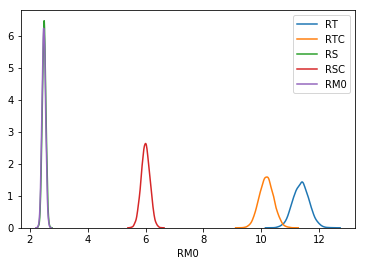

In [62]:
sns.distplot(df['RT'],hist=False,label="RT");
sns.distplot(df['RTC'],hist=False,label="RTC");
sns.distplot(df['RS'],hist=False,label="RS");
sns.distplot(df['RSC'],hist=False,label="RSC");
ax=sns.distplot(df['RM0'],hist=False,label="RM0");

<img src="DOE6G_2T.PNG" ALIGN="left" width="400" height="500"> 

,RT,RT0,RTC,RS,RS0,RSC,RL0,RM0,RTL,RSL,TG_R,SG_R,RL,TG_SG_R,STOR
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,11.37,1.20,10.17,2.50,1.00,6.00,1.45,2.49,11.37,7.00,22.74,9.50,3.94,6.70,10.64
std,0.28,0.03,0.25,0.06,0.03,0.15,0.04,0.06,0.25,0.15,0.38,0.16,0.07,0.09,0.11
min,10.28,1.08,9.23,2.28,0.91,5.47,1.30,2.24,10.42,6.43,21.41,8.92,3.68,6.39,10.19
25%,11.18,1.18,10.00,2.46,0.98,5.90,1.43,2.45,11.20,6.90,22.48,9.39,3.89,6.64,10.56
50%,11.37,1.20,10.17,2.50,1.00,6.00,1.45,2.49,11.37,7.00,22.74,9.50,3.94,6.70,10.64
75%,11.56,1.22,10.34,2.54,1.02,6.10,1.47,2.53,11.54,7.10,22.99,9.61,3.99,6.76,10.72
max,12.58,1.30,11.15,2.74,1.09,6.56,1.57,2.72,12.33,7.58,24.26,10.09,4.23,7.03,11.11


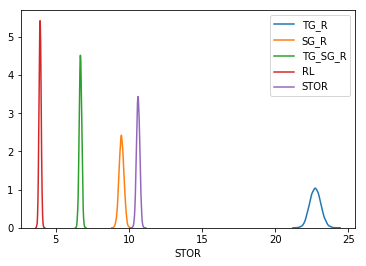

In [63]:
df['RTL']=df['RT0']+df['RTC']
df['RSL']=df['RS0']+df['RSC']

df['TG_R']=df['RT']+df['RTL']
df['SG_R']=df['RS']+df['RSL']
df['RL']=df['RL0']+df['RM0']
ans=np.vectorize(getSTOR)

df['TG_SG_R']=ans(df.TG_R,df.SG_R,df.RL)[0]
df['STOR']=ans(df.TG_R,df.SG_R,df.RL)[1]

sns.distplot(df['TG_R'],hist=False,label="TG_R");
sns.distplot(df['SG_R'],hist=False,label="SG_R");
sns.distplot(df['TG_SG_R'],hist=False,label="TG_SG_R");
sns.distplot(df['RL'],hist=False,label="RL");
sns.distplot(df['STOR'],hist=False,label="STOR",);

df.describe().round(2)

In [64]:
# Io can be calculated based on voltage at RT
df['V_RTL']=V_RT*df['RTL']/df['RT']



<img src="simpleSTOR.PNG" width=500> 

In [65]:
# # Calculate T-Slope for SG and TG (deltaT/deltaT)
df['bias_current']=V0/df['TG_SG_R'] 
bias_current_median=df['bias_current'].median()
# df['bias_current']=bias_current_median    #to compare the constant current bias with const volt bias


df['TG_iRatio']=df['SG_R']/(df['TG_R']+df['SG_R'])
df['SG_iRatio']=1-df['TG_iRatio']
df['iTG']=df['bias_current']*df['TG_iRatio']
df['iSG']=df['bias_current']-df['iTG']

df['pwRTG']=(df['iTG']**2)*df['RT']/1000
df['pwRSG']=(df['iSG']**2)*df['RS']/1000

df['dT_RTG']=RT_dTdW*df['pwRTG']
df['dT_RSG']=RS_dTdW*df['pwRSG']
df['dTemp']=df['dT_RTG']+df['dT_RSG']
df['Temp']=df['dTemp']+T0

now=datetime.datetime.now()
month=now.month
day=now.day
second=now.second
df.to_csv(fname + "-{}-{}_{}sec.csv".format(month, day, second))
df.describe()

,RT,RT0,RTC,RS,RS0,RSC,RL0,RM0,RTL,RSL,TG_R,SG_R,RL,TG_SG_R,STOR,V_RTL,bias_current,TG_iRatio,SG_iRatio,iTG,iSG,pwRTG,pwRSG,dT_RTG,dT_RSG,dTemp,Temp
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.369759,1.199928,10.172517,2.499268,1.000246,6.000469,1.450000,2.488117,11.372445,7.000716,22.742204,9.499983,3.938117,6.700065,10.638182,50.042128,1.492613e+01,0.294666,0.705334,4.398223,10.527906,0.219908,0.276997,23.750015,17.173812,40.923827,40.923827
std,0.280436,0.030076,0.246553,0.062524,0.025026,0.150877,0.036106,0.062336,0.247907,0.152721,0.375317,0.164845,0.072245,0.088170,0.113430,1.644423,1.193771e-12,0.004983,0.004983,0.074374,0.074374,0.006513,0.006930,0.703410,0.429642,0.790712,0.790712
min,10.279689,1.077895,9.233723,2.279192,0.905938,5.466706,1.297135,2.243150,10.416318,6.431644,21.410751,8.920295,3.681271,6.388337,10.187961,44.157208,1.492613e+01,0.277410,0.687273,4.140656,10.258333,0.196822,0.251841,21.256747,15.614145,37.982300,37.982300
25%,11.177469,1.179385,10.004187,2.456989,0.983275,5.898800,1.425769,2.445605,11.201432,6.898476,22.483772,9.388036,3.889241,6.640679,10.561338,48.924237,1.492613e+01,0.291295,0.701930,4.347900,10.477102,0.215597,0.272306,23.284424,16.882978,40.385610,40.385610
50%,11.372612,1.200219,10.171441,2.499332,1.000298,6.000083,1.449870,2.487532,11.370441,7.000895,22.739033,9.499198,3.938099,6.699660,10.637253,50.012792,1.492613e+01,0.294698,0.705302,4.398694,10.527436,0.219858,0.276920,23.744652,17.169041,40.920251,40.920251
75%,11.556749,1.220377,10.338537,2.541316,1.017188,6.102259,1.474046,2.530056,11.538338,7.103265,22.993876,9.610559,3.986449,6.759684,10.715382,51.130047,1.492613e+01,0.298070,0.708705,4.449028,10.578230,0.224343,0.281668,24.229019,17.463421,41.461300,41.461300
max,12.578227,1.297564,11.149785,2.741839,1.094434,6.564148,1.574507,2.719792,12.331390,7.582655,24.255068,10.090480,4.225212,7.030094,11.107379,56.892933,1.492613e+01,0.312727,0.722590,4.667797,10.785473,0.243354,0.305506,26.282282,18.941354,43.925517,43.925517


In [66]:
df.describe()

,RT,RT0,RTC,RS,RS0,RSC,RL0,RM0,RTL,RSL,TG_R,SG_R,RL,TG_SG_R,STOR,V_RTL,bias_current,TG_iRatio,SG_iRatio,iTG,iSG,pwRTG,pwRSG,dT_RTG,dT_RSG,dTemp,Temp
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.369759,1.199928,10.172517,2.499268,1.000246,6.000469,1.450000,2.488117,11.372445,7.000716,22.742204,9.499983,3.938117,6.700065,10.638182,50.042128,1.492613e+01,0.294666,0.705334,4.398223,10.527906,0.219908,0.276997,23.750015,17.173812,40.923827,40.923827
std,0.280436,0.030076,0.246553,0.062524,0.025026,0.150877,0.036106,0.062336,0.247907,0.152721,0.375317,0.164845,0.072245,0.088170,0.113430,1.644423,1.193771e-12,0.004983,0.004983,0.074374,0.074374,0.006513,0.006930,0.703410,0.429642,0.790712,0.790712
min,10.279689,1.077895,9.233723,2.279192,0.905938,5.466706,1.297135,2.243150,10.416318,6.431644,21.410751,8.920295,3.681271,6.388337,10.187961,44.157208,1.492613e+01,0.277410,0.687273,4.140656,10.258333,0.196822,0.251841,21.256747,15.614145,37.982300,37.982300
25%,11.177469,1.179385,10.004187,2.456989,0.983275,5.898800,1.425769,2.445605,11.201432,6.898476,22.483772,9.388036,3.889241,6.640679,10.561338,48.924237,1.492613e+01,0.291295,0.701930,4.347900,10.477102,0.215597,0.272306,23.284424,16.882978,40.385610,40.385610
50%,11.372612,1.200219,10.171441,2.499332,1.000298,6.000083,1.449870,2.487532,11.370441,7.000895,22.739033,9.499198,3.938099,6.699660,10.637253,50.012792,1.492613e+01,0.294698,0.705302,4.398694,10.527436,0.219858,0.276920,23.744652,17.169041,40.920251,40.920251
75%,11.556749,1.220377,10.338537,2.541316,1.017188,6.102259,1.474046,2.530056,11.538338,7.103265,22.993876,9.610559,3.986449,6.759684,10.715382,51.130047,1.492613e+01,0.298070,0.708705,4.449028,10.578230,0.224343,0.281668,24.229019,17.463421,41.461300,41.461300
max,12.578227,1.297564,11.149785,2.741839,1.094434,6.564148,1.574507,2.719792,12.331390,7.582655,24.255068,10.090480,4.225212,7.030094,11.107379,56.892933,1.492613e+01,0.312727,0.722590,4.667797,10.785473,0.243354,0.305506,26.282282,18.941354,43.925517,43.925517


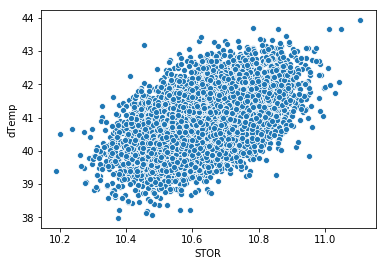

In [67]:
sns.scatterplot(x=df.STOR,y=df.dTemp)

,STOR,dT_RTG,dT_RSG,dTemp
count,10000.00,10000.00,10000.00,10000.00
mean,10.64,23.75,17.17,40.92
std,0.11,0.70,0.43,0.79
min,10.19,21.26,15.61,37.98
25%,10.56,23.28,16.88,40.39
50%,10.64,23.74,17.17,40.92
75%,10.72,24.23,17.46,41.46
max,11.11,26.28,18.94,43.93


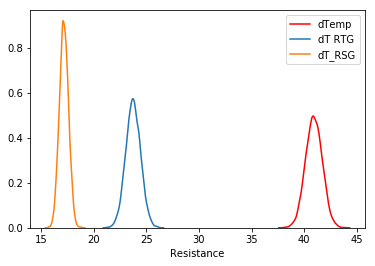

In [68]:
sns.distplot(df['dTemp'],hist=False,label='dTemp',color='r');
sns.distplot(df['dT_RTG'],hist=False,label="dT RTG");
sns.distplot(df['dT_RSG'],hist=False,label="dT_RSG");
plt.xlabel("Resistance")


df.describe().to_csv('RTG 20%, RSG: 10%, all lead 5%')
df[['STOR','dT_RTG','dT_RSG','dTemp']].describe().round(2)

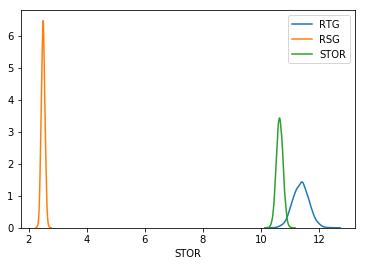

In [69]:


sns.distplot(df['RT'],hist=False,label="RTG");
sns.distplot(df['RS'],hist=False,label="RSG");
sns.distplot(df['STOR'],hist=False,label="STOR",);
# plt.xlim(left=4.7, right=6.5)
